#Are DL power usage and Quality associated with drop call increase?

##Introduction
Mobile radio network consists on several base station that offer coverage to specific area. 
Nowadays, there are different cellular technology like GSM, UMTS, CDMA, LTE and so on, however this study is only focus on 3G/UMTS technology.

##Goal

The radio network performance is measured in terms of Quality of Service (QoS). RF engineer on daily basis need to check performance indicator (KPI) for each base station. This task is really overwhelmed so it required to find a quick procedure to identify bad performance sites.

it's already known 3G network is limited by power so the main goal of this study is to find those cells with high drops due to power or quality issue. Then, RF engineer can address and fix the problem.

##Analisys

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Import the stats library from numpy
from scipy import stats

#These are the plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Inline plot
%matplotlib inline

#Floating point numbersFloating point
from __future__ import division

In [54]:
#Import dataset
dframe =pd.read_csv('3G_ML_11415_2.csv')

In [55]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132664 entries, 0 to 132663
Data columns (total 51 columns):
PERIOD_START_TIME              132664 non-null object
WCEL_NAME                      132664 non-null object
VOICE_TRAFFIC                  130768 non-null float64
VOICE_DROPS                    132664 non-null int64
RRC_CONN_STP_FAIL_AC_DL        130768 non-null float64
RAB_STP_FAIL_CS_VOICE_AC_DL    130768 non-null float64
PS_SETUP_FAIL_AC_DL_NRT        130733 non-null float64
TX_CR_PWR_CLASS_0              132664 non-null int64
TX_CR_PWR_CLASS_1              132664 non-null int64
TX_CR_PWR_CLASS_2              132664 non-null int64
TX_CR_PWR_CLASS_3              132664 non-null int64
TX_CR_PWR_CLASS_4              132664 non-null int64
TX_CR_PWR_CLASS_5              132664 non-null int64
TX_CR_PWR_CLASS_6              132664 non-null int64
TX_CR_PWR_CLASS_7              132664 non-null int64
TX_CR_PWR_CLASS_8              132664 non-null int64
TX_CR_PWR_CLASS_9              

In [56]:
#Remove Null values
dframe=dframe.dropna()
#Reset Index
dframe.reset_index(drop=True, inplace=True)

In [57]:
dframe.head(10)

,PERIOD_START_TIME,WCEL_NAME,VOICE_TRAFFIC,VOICE_DROPS,RRC_CONN_STP_FAIL_AC_DL,RAB_STP_FAIL_CS_VOICE_AC_DL,PS_SETUP_FAIL_AC_DL_NRT,TX_CR_PWR_CLASS_0,TX_CR_PWR_CLASS_1,TX_CR_PWR_CLASS_2,...,CPICH_EC_NO_CLASS_1,CPICH_EC_NO_CLASS_2,CPICH_EC_NO_CLASS_3,CPICH_EC_NO_CLASS_4,CPICH_EC_NO_CLASS_5,CPICH_EC_NO_CLASS_6,CPICH_EC_NO_CLASS_7,CPICH_EC_NO_CLASS_8,CPICH_EC_NO_CLASS_9,SOFT_HO_FAIL_RATE
0,10/30/2015 0:00,CELL_2662,13.958750,4,0,0,0,0,0,0,...,5180,2719,2046,1349,688,295,84,22,0,0.039233
1,10/30/2015 0:00,CELL_2663,14.339367,1,0,0,0,0,0,0,...,1879,905,661,396,225,84,24,1,0,0.013510
2,10/30/2015 0:00,CELL_2665,19.228911,0,0,0,0,0,0,0,...,4476,985,557,244,95,44,8,0,0,0.007969
3,10/30/2015 0:00,CELL_2664,23.729242,1,0,0,0,0,0,0,...,5591,1405,723,319,109,35,10,0,0,0.006021
4,10/30/2015 0:00,CELL_2667,8.979358,1,0,0,0,0,0,0,...,963,370,411,343,189,84,22,3,0,0.026441
5,10/30/2015 0:00,CELL_2666,9.770514,0,0,0,0,0,0,0,...,1205,767,689,522,319,154,38,2,0,0.139058
6,10/30/2015 0:00,CELL_3789,115.357564,8,0,0,0,0,0,0,...,19603,9855,4611,1419,320,74,17,7,0,0.050070
7,10/30/2015 0:00,CELL_3790,101.193989,3,0,0,0,0,0,0,...,19335,9897,4307,1132,309,85,11,2,0,0.025849
8,10/30/2015 0:00,CELL_3791,100.466706,4,0,0,0,0,0,0,...,10671,8298,5332,1816,475,127,40,1,0,0.105692
9,10/30/2015 0:00,CELL_3792,88.379242,1,0,0,0,0,0,0,...,11019,8482,5336,1868,423,102,28,5,0,0.073669


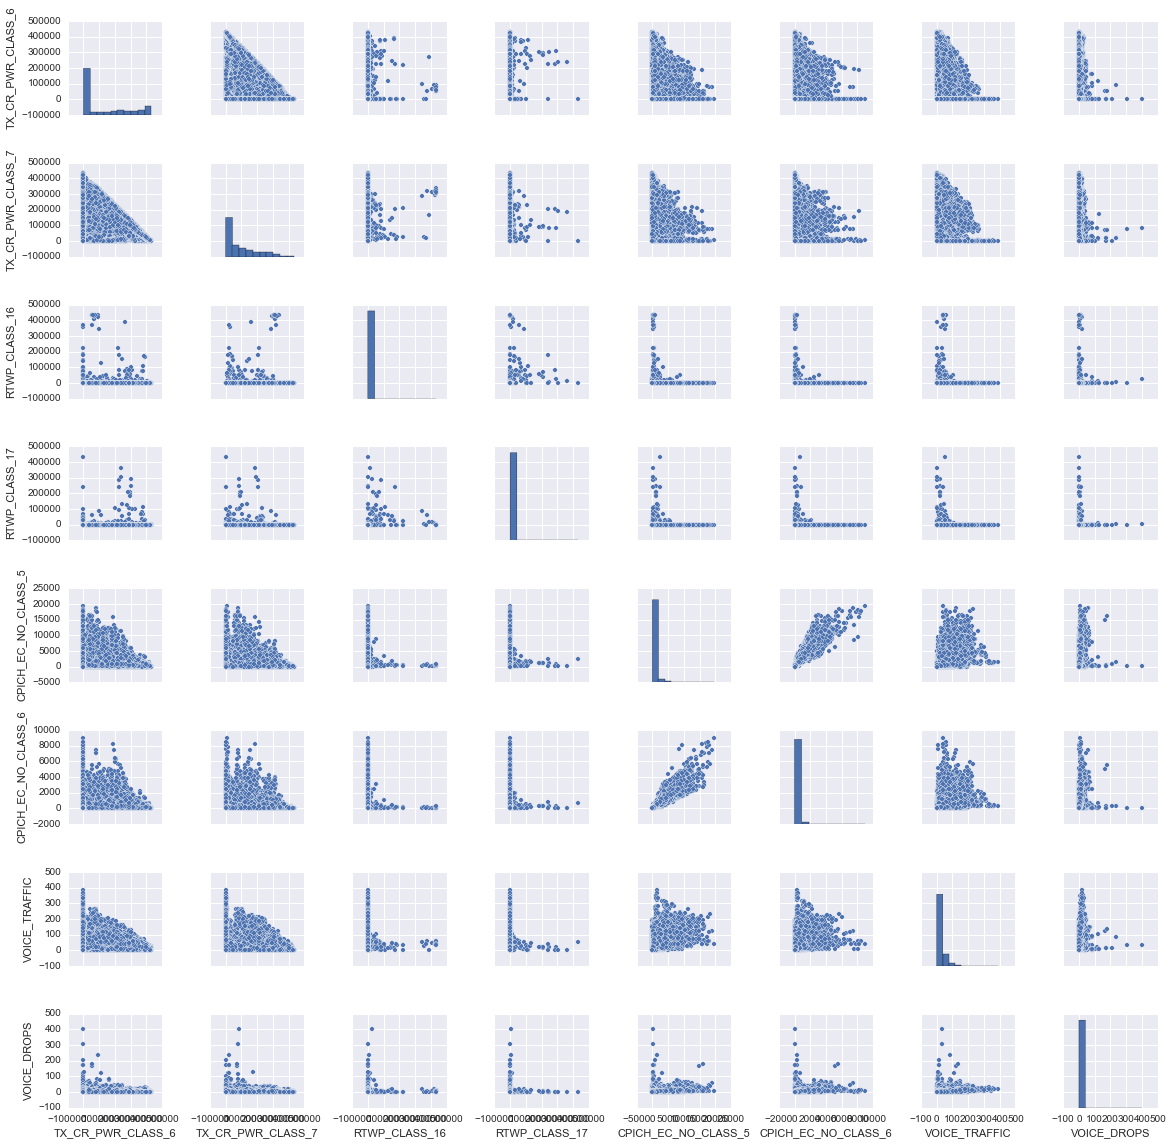

In [58]:
#Examining the data set 
g = sns.pairplot(dframe[['TX_CR_PWR_CLASS_6', 'TX_CR_PWR_CLASS_7', 'RTWP_CLASS_16','RTWP_CLASS_17','CPICH_EC_NO_CLASS_5','CPICH_EC_NO_CLASS_6', 'VOICE_TRAFFIC', 'VOICE_DROPS']],size=2)

To find relationship among features and response, linear regression model will be applied, however above plots show very high variance and skewed distribution. Before to continue with the analysis it's required to clean and prepare this dataset

Below are the steps to simplify and normalize the data:

* Create new features.
* Sampling distribution.

##Preparation of Data (Priori Knowledge)
###Creating new features

In [59]:
#HIGH_TX_PWR_USAGE
dframe['HIGH_TX_PWR_USAGE']=np.round(100*(dframe['TX_CR_PWR_CLASS_10'])/(dframe['TX_CR_PWR_CLASS_0']+dframe['TX_CR_PWR_CLASS_1']+dframe['TX_CR_PWR_CLASS_2']+dframe['TX_CR_PWR_CLASS_3']+dframe['TX_CR_PWR_CLASS_4']+dframe['TX_CR_PWR_CLASS_5']+dframe['TX_CR_PWR_CLASS_6']+dframe['TX_CR_PWR_CLASS_7']+dframe['TX_CR_PWR_CLASS_8']+dframe['TX_CR_PWR_CLASS_9']+dframe['TX_CR_PWR_CLASS_10']),0)

In [60]:
#POOR_RWTP
dframe['POOR_RTWP']=np.round(100-100*(dframe['RTWP_CLASS_0']+dframe['RTWP_CLASS_1']+dframe['RTWP_CLASS_2']+dframe['RTWP_CLASS_3']+dframe['RTWP_CLASS_4']+dframe['RTWP_CLASS_5']+dframe['RTWP_CLASS_6']+dframe['RTWP_CLASS_7']+dframe['RTWP_CLASS_8'])/(dframe['RTWP_CLASS_0']+dframe['RTWP_CLASS_1']+dframe['RTWP_CLASS_2']+dframe['RTWP_CLASS_3']+dframe['RTWP_CLASS_4']+dframe['RTWP_CLASS_5']+dframe['RTWP_CLASS_6']+dframe['RTWP_CLASS_7']+dframe['RTWP_CLASS_8']+dframe['RTWP_CLASS_9']+dframe['RTWP_CLASS_10']+dframe['RTWP_CLASS_11']+dframe['RTWP_CLASS_12']+dframe['RTWP_CLASS_13']+dframe['RTWP_CLASS_14']+dframe['RTWP_CLASS_15']+dframe['RTWP_CLASS_16']+dframe['RTWP_CLASS_17']+dframe['RTWP_CLASS_18']+dframe['RTWP_CLASS_19']+dframe['RTWP_CLASS_20']+dframe['RTWP_CLASS_21']),0)

In [61]:
#POOR_ECNO
dframe['POOR_ECNO']=np.round(100*(dframe['CPICH_EC_NO_CLASS_5']+dframe['CPICH_EC_NO_CLASS_6']+dframe['CPICH_EC_NO_CLASS_7']+dframe['CPICH_EC_NO_CLASS_8']+dframe['CPICH_EC_NO_CLASS_9'])/(dframe['CPICH_EC_NO_CLASS_0']+dframe['CPICH_EC_NO_CLASS_1']+dframe['CPICH_EC_NO_CLASS_2']+dframe['CPICH_EC_NO_CLASS_3']+dframe['CPICH_EC_NO_CLASS_4']+dframe['CPICH_EC_NO_CLASS_5']+dframe['CPICH_EC_NO_CLASS_6']+dframe['CPICH_EC_NO_CLASS_7']+dframe['CPICH_EC_NO_CLASS_8']+dframe['CPICH_EC_NO_CLASS_9']),0)

In [62]:
#Remove Null values
dframe=dframe.dropna()
#Reset Index
dframe.reset_index(drop=True, inplace=True)

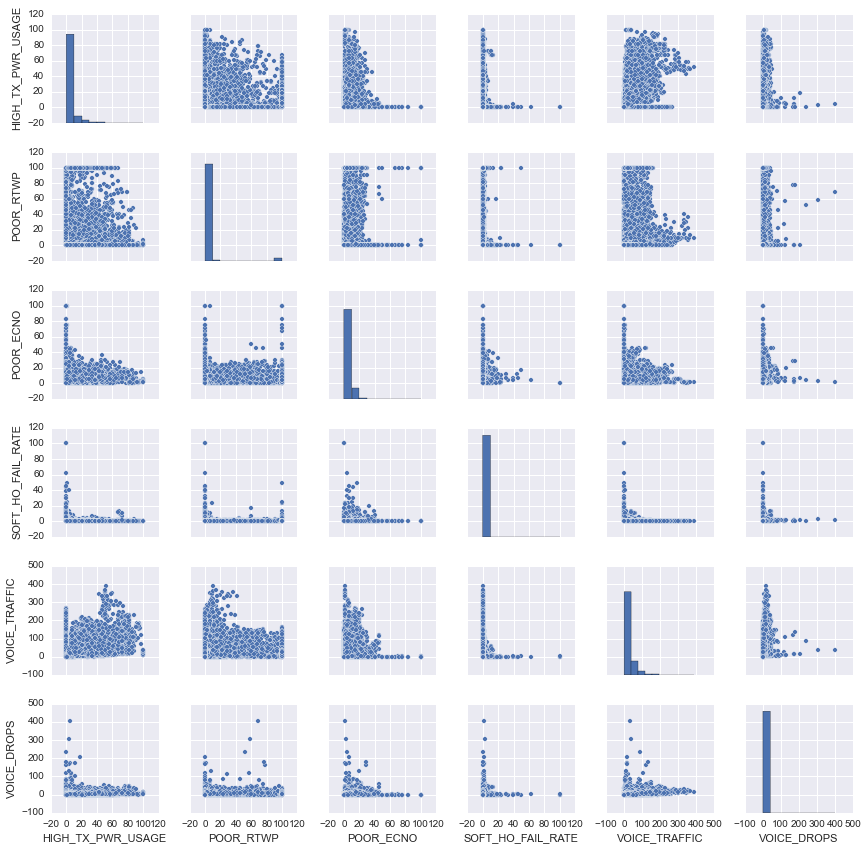

In [240]:
g = sns.pairplot(dframe[['HIGH_TX_PWR_USAGE', 'POOR_RTWP', 'POOR_ECNO','SOFT_HO_FAIL_RATE', 'VOICE_TRAFFIC', 'VOICE_DROPS']],size=2)

What are the **features**?
* POOR_ECNO: Quality measurment (%)
* HIGH_TX_PWR_USAGE: DL Power usage (%)
* POOR_RTWP: UL Interference (%)
* SOFT_HO_FAIL_RATE:  Failure to transfer an ongoing call among cells (%)

What is the **response**?
* Raw Voice Drops

###Sampling Distribution

In [63]:
dframe=dframe[['HIGH_TX_PWR_USAGE', 'POOR_RTWP', 'POOR_ECNO','SOFT_HO_FAIL_RATE', 'VOICE_TRAFFIC', 'VOICE_DROPS']].copy()

In [64]:
#Sampling Distribution (smooths the data) maybe high bias
dframe['sampling']=DataFrame(np.random.randint(100, size=192875))

In [65]:
# Mean/Median data on voice drops
dframe = dframe.groupby(['sampling']).mean()

In [66]:
#Remove Null values
dframe=dframe.dropna()
#Drop was part of the index so it's required to reset index
dframe.reset_index(inplace=True)

In [67]:
dframe.drop('sampling',axis=1,inplace=True)

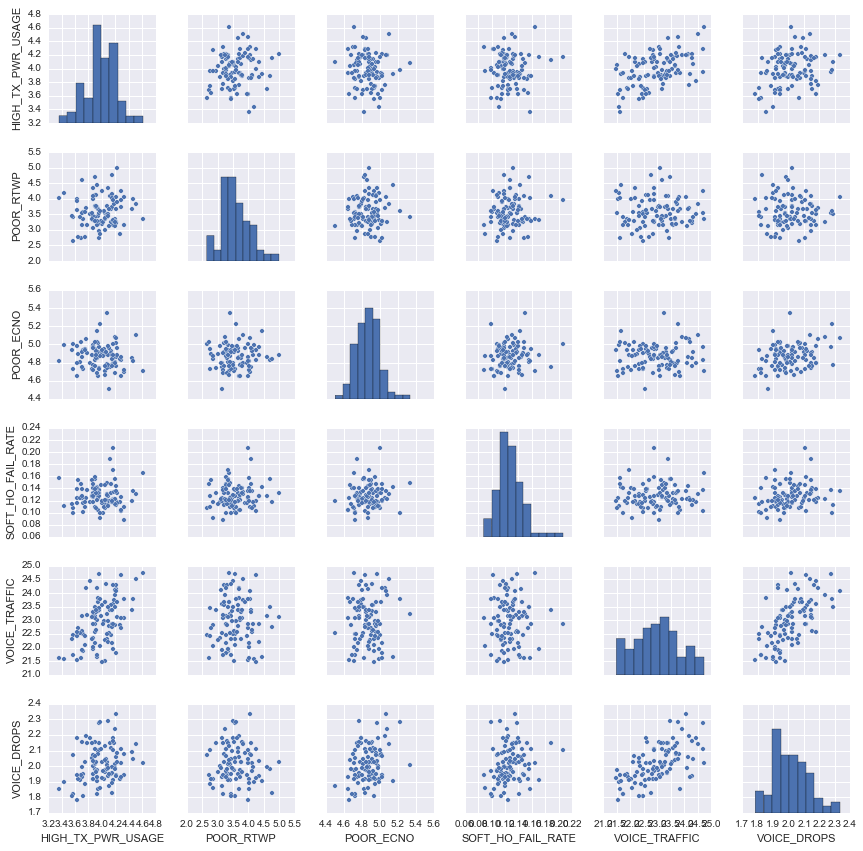

In [84]:
g = sns.pairplot(dframe[['HIGH_TX_PWR_USAGE', 'POOR_RTWP', 'POOR_ECNO','SOFT_HO_FAIL_RATE', 'VOICE_TRAFFIC', 'VOICE_DROPS']],size=2)

##Linear Regression

###Using Statsmodels to estimate the model coefficients

In [81]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='VOICE_DROPS ~ HIGH_TX_PWR_USAGE + POOR_RTWP + POOR_ECNO + SOFT_HO_FAIL_RATE + VOICE_TRAFFIC', data=dframe).fit()


In [82]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            VOICE_DROPS   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     16.55
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           1.08e-11
Time:                        21:56:17   Log-Likelihood:                 105.66
No. Observations:                 100   AIC:                            -199.3
Df Residuals:                      94   BIC:                            -183.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -1.0367      0.408     -2.542      0.013        -1.846    -0.227
HIGH_TX_PWR_USAGE    -0.0155      0.044     -0.355      0.724        -0.103     0.071
POOR_RTWP            -0.0109      0.019     -0.574      0.567        -0.049     0.027
POOR_ECNO             0.2173      0.068      3.214      0.002         0.083     0.352
SOFT_HO_FAIL_RATE     0.9806      0.463      2.116      0.037         0.061     1.900
VOICE_TRAFFIC         0.0857      0.012      6.976      0.000         0.061     0.110
==============================================================================
Omnibus:                        1.669   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.114
Skew:                           0.193   Prob(JB):                        0.573
Kurtosis:                       3.345   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####Hypothesis Testing and p-values

####How Well Does the Model Fit the data?

In [83]:
# print the R-squared value for the model
lm.rsquared

0.46817909678192005

###Using sklearn

In [68]:
import sklearn
from sklearn.linear_model import LinearRegression

In [69]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [70]:
#SciKit learn does require a numpy array
# Data Columns
X_multi = dframe.drop('VOICE_DROPS',axis=1).values

# Targets 
Y_target = dframe.VOICE_DROPS.values

In [71]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# Set a DataFrame from the Features
coeff_df = DataFrame(dframe.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
#coeff_df.sort(['Coefficient Estimate'])
coeff_df

,Features,Coefficient Estimate
0,HIGH_TX_PWR_USAGE,-0.015546
1,POOR_RTWP,-0.010874
2,POOR_ECNO,0.217268
3,SOFT_HO_FAIL_RATE,0.980569
4,VOICE_TRAFFIC,0.085703
5,VOICE_DROPS,NaN


In [73]:
# calculate the R-squared
lreg.score(X_multi,Y_target)

0.46817909678191971

####Predicting and Validating Model

In [74]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi,Y_target)

In [75]:
# Print shapes of the training and testing data sets
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(75L, 5L) (25L, 5L) (75L,) (25L,)


In [76]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [78]:
#Error
print (np.sum(np.abs(Y_train - pred_train) )) / np.sum(Y_train)
    
print (np.sum(np.abs(Y_test - pred_test))) / np.sum(Y_test)

0.0341867143104
0.0294232069366


####Residual Plots

Residual=Observedvalue−Predictedvalue

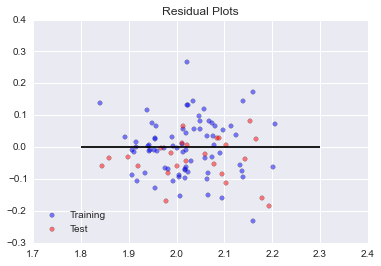

In [80]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=1.8, xmax=2.3)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

##Building Classifier

Now with this knowledge gained, after preparing the data and running a linear regression model, we can build a classifier to suggest what are the reason of drop call

###Discretization of continuous features

To reduce complexity of the model discretization of each features(KPI) is required. Domain knowledge is very important to decide when a cell is in good/bad performance

In [219]:
# function to classify kpi by severity  (critical,bad,normal,good)
def severity2(kpi, critical):
    # Compare raw drop call
    if kpi < critical:
        return 0
    else:
        return 1

In [220]:
# New column called 'severity'
dframe['SOFT_HO_FAIL_SEV'] = dframe['SOFT_HO_FAIL_RATE'].apply(severity2, args = ( 0.3,) )

In [221]:
# New column called 'severity'
dframe['HIGH_TX_PWR_USAGE_SEV'] = dframe['HIGH_TX_PWR_USAGE'].apply(severity2, args = (31,))

In [222]:
# New column called 'severity'
dframe['POOR_RTWP_SEV'] = dframe['POOR_RTWP'].apply(severity2, args = (22,))

In [223]:
# New column called 'severity'
dframe['POOR_ECNO_SEV'] = dframe['POOR_ECNO'].apply(severity2, args = (8,))

In [224]:
# New column called 'severity'
dframe['VOICE_TRAFFIC_SEV'] = dframe['VOICE_TRAFFIC'].apply(severity2, args = (35,))

In [225]:
# function to classify drop call by severity 
def severity3(dc):
    # Compare raw drop call
    if dc >= 0 and dc < 11:
        return 0
    elif dc >= 11 and dc < 21:
        return 1
    elif dc >= 21 and dc < 31:
        return 2    
    elif dc >= 31 and dc < 41:
        return 3
    else:
        return 4

In [226]:
# New column called 'dc_severity'
dframe['VOICE_DROPS_RAW_SEV'] = dframe['VOICE_DROPS'].apply(severity3)    

In [227]:
dframe['VOICE_DROPS_RAW_SEV'].value_counts() 

0    126434
1      3373
2       512
3       144
4        81
dtype: int64

In [205]:
#dframe = dframe[['PERIOD_START_TIME', 'WCEL_NAME', 'VOICE_DROPS_RAW_SEV','VOICE_TRAFFIC_SEV', 'SOFT_HO_FAIL_SEV', 'HIGH_TX_PWR_USAGE_SEV', 'POOR_RTWP_SEV', 'POOR_ECNO_SEV']].copy()
dframe2 = dframe[['SOFT_HO_FAIL_SEV', 'HIGH_TX_PWR_USAGE_SEV', 'POOR_RTWP_SEV', 'POOR_ECNO_SEV']].copy()

In [60]:
#Export data to csv
dframe.to_csv('ml_1027_GCR_Final.csv',index = False)

In [85]:
#dframe.drop_duplicates(inplace = 'True')
#dframe.reset_index(drop=True, inplace=True)
#dframe.head()

###Training Classifier

In [86]:
reason =pd.read_csv('reason.csv')

In [87]:
reason

,FEEDBACK,REASON
0,0,OKAY
1,1,POOR_ECNO
2,2,POOR_RTWP
3,3,POOR_ECNO POOR_RTWP
4,4,HIGH_TX_PWR_USAGE
5,5,POOR_ECNO HIGH_TX_PWR_USAGE
6,6,POOR_RTWP HIGH_TX_PWR_USAGE
7,7,POOR_ECNO POOR_RTWP HIGH_TX_PWR_USAGE
8,8,SOFT_HO_FAIL
9,9,POOR_ECNO SOFT_HO_FAIL


In [115]:
#Training Dataset
dframe =pd.read_csv('training_dataset.csv')

In [118]:
dframe.head()

,SOFT_HO_FAIL_SEV,HIGH_TX_PWR_USAGE_SEV,POOR_RTWP_SEV,POOR_ECNO_SEV,FEEDBACK
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,2
3,0,0,1,1,3
4,0,1,0,0,4


In [119]:
import sklearn
from sklearn.naive_bayes import GaussianNB

In [120]:
#SciKit learn does require a numpy array
# Data Columns
X_multi = dframe.drop('FEEDBACK',axis=1).values

# Targets 
Y_target = dframe.FEEDBACK.values #Y_target = dframe['voice_drop'].values

In [121]:
# Fit a Naive Bayes model to the data
model = GaussianNB()

In [123]:
from sklearn.cross_validation import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y_target)

In [124]:
# Fit the training model
model.fit(X_train,Y_train)

GaussianNB()

In [125]:
# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outcomes
expected = Y_test

In [137]:
from sklearn import metrics
print metrics.accuracy_score(expected, predicted)

1.0


In [144]:
#saving the model
from sklearn.externals import joblib
joblib.dump(model, 'naive.pkl') 

['naive.pkl',
 'naive.pkl_01.npy',
 'naive.pkl_02.npy',
 'naive.pkl_03.npy',
 'naive.pkl_04.npy',
 'naive.pkl_05.npy']

In [146]:
#loading the model
clf = joblib.load('naive.pkl') 


In [147]:
p = clf.predict(X_test)

In [148]:
print metrics.accuracy_score(expected, p)

1.0


###Labelling New DataFrame

In [206]:
X = dframe2.values

In [207]:
Y_predicted = model.predict(X)

In [208]:
dframe['FEEDBACK']=DataFrame(Y_predicted)

In [209]:
dframe.to_csv('ml_1114_feedback.csv',index = False)

In [93]:
#dframe.head('SOFT_HO_FAIL_SEV', 'HIGH_TX_PWR_USAGE_SEV', 'POOR_RTWP_SEV', 'POOR_ECNO_SEV', 'FEEDBACK')